# Chapter: Best Practices

# Topic: Quadratic fit using pipeline

In [2]:
# read data
import numpy as np
data = np.loadtxt('quadratic_raw_data.csv', delimiter=',')
x = data[:,0,None]; y = data[:,1,None]

In [4]:
# create pipeline for quadratic fit via linear model 
# import relevant classes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# add transformers and estimators sequentially as list of tuples
# the names ‘poly’, ‘scaler’, ‘model’ can be used to access the individual elements of pipeline later 
pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression())])

In [5]:
# fit pipeline and predict
pipe.fit(x, y)
y_predicted = pipe.predict(x)

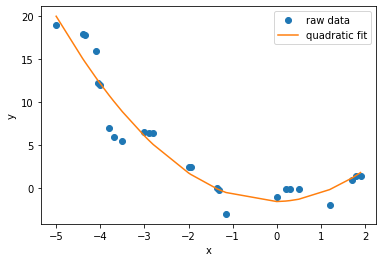

Fitting metric (R2) =  0.9161437726284858
Fitting metric (R2) =  0.9161437726284858


In [6]:
# check predictions
# plot
from matplotlib import pyplot as plt
plt.figure()
plt.plot(x,y, 'o', label='raw data')
plt.plot(x,y_predicted, label='quadratic fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()

# performance metric
from sklearn.metrics import r2_score
print('Fitting metric (R2) = ', r2_score(y, y_predicted))

# performance metric vis score method
print('Fitting metric (R2) = ', pipe.score(x,y)) # no need to import metrics module